<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

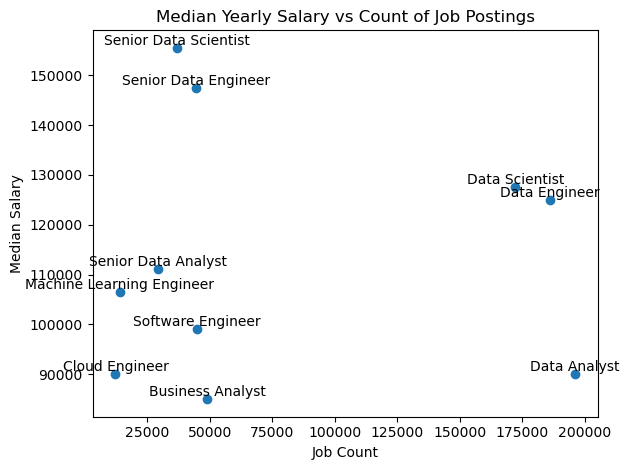

In [45]:
# Problem Statement:
# Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
# To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
# Annotate each point with the job title name.

job_count_median_salary=df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg','median'),
    job_count=('job_title_short','size')
)
plt.scatter(job_count_median_salary['job_count'],job_count_median_salary['median_salary'])
plt.xlabel('Job Count')
plt.ylabel('Median Salary')
plt.title('Median Yearly Salary vs Count of Job Postings')
for i,txt in job_count_median_salary.iterrows():
    plt.text(txt.job_count,txt.median_salary,i,ha='center',va='bottom')
plt.tight_layout()
plt.show()


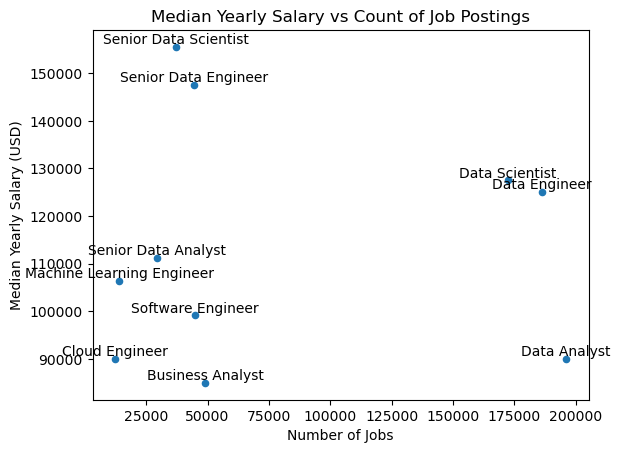

In [46]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

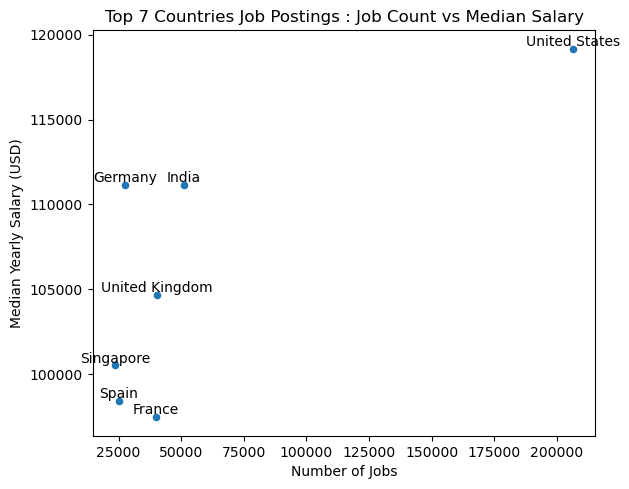

In [76]:
# Problem Statement:
# Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on 
# highest number of job postings. Annotate each point with the country's name.


axis=df.groupby('job_country').agg(
    country=('job_country','size'),
    salary=('salary_year_avg','median')
).sort_values(by='country',ascending=False).head(7)
axis.plot(kind='scatter',x='country',y='salary')
for i,txt in axis.iterrows():
    plt.text(txt.country,txt.salary,i,ha='center',va='bottom')
plt.tight_layout()
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings : Job Count vs Median Salary')
plt.show()

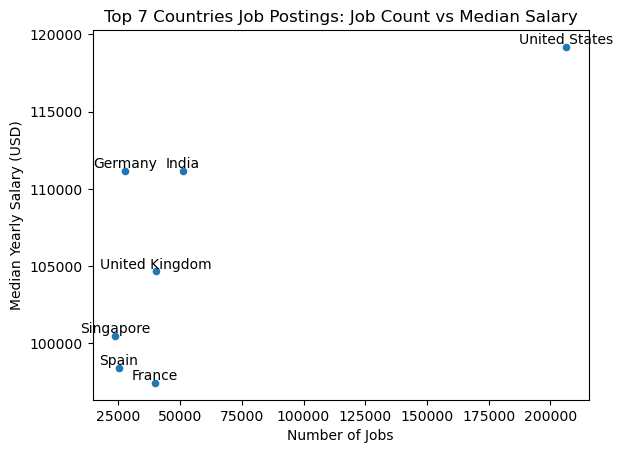

In [77]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

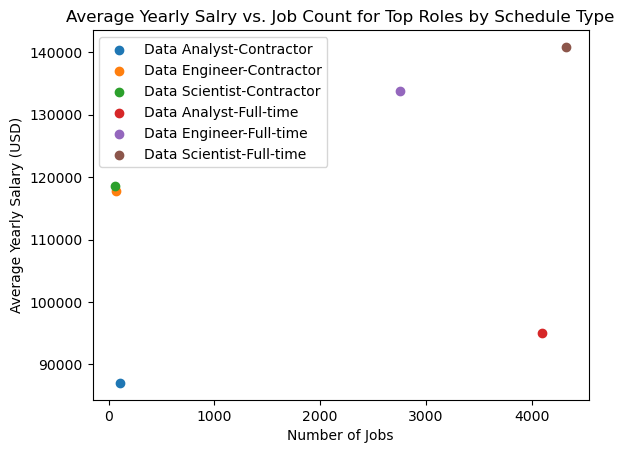

In [239]:
# Problem Statement:
# Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
# Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
# United States for the job_country
# 'Full-time' and 'Contractor' for the job_schedule_type
# Remove roles that do not have any yearly salary data.
# Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
# For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
# Ensure the legend is appearing.
# Label the plot's axis and title appropriately.

# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_country=df[df.job_country.isin(['United States'])].copy()
df_US_job_filtered=df_country[df_country.job_title_short.isin(target_job_titles)]
df_ft_c=df_US_job_filtered[df_US_job_filtered.job_schedule_type.isin(['Full-time','Contractor'])]
job_title_type=df_ft_c.dropna(subset='salary_year_avg').groupby(['job_schedule_type','job_title_short']).agg({'salary_year_avg':'mean','job_schedule_type':'size'})
job_title_type.index=job_title_type.job_schedule_type.index.map(lambda x: f'{x[1]}-{x[0]}')

job_title_type.index.name='job_title'
job_title_type.reset_index(inplace=True)
for i in range(len(job_title_type)):
    subset=job_title_type[job_title_type.job_title==job_title_type.job_title[i]]
    plt.scatter(subset.job_schedule_type,subset.salary_year_avg,label=subset.job_title[i])
plt.legend()
plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salry vs. Job Count for Top Roles by Schedule Type')
plt.show()


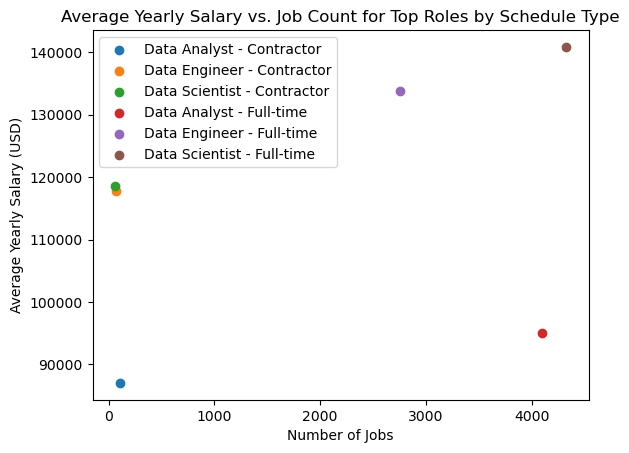

In [237]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

---